In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

import os
import random
import numpy as np
import matplotlib.pyplot as plt

# ignore information messgaes from tensorflow, but we will receieve error messages
os.environ['TFF_CPP_MIN_LOG_LEVEL'] = '2'

%matplotlib inline

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print()
print(f"Shape of x_test: {x_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)

Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


Image (#9): Which is digit '4'


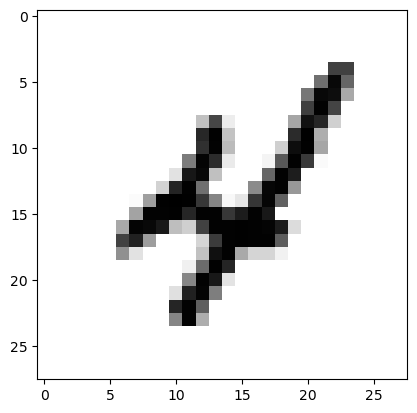

In [ ]:
digit = 9 # Change to choose new digit
a = x_train[digit]
plt.imshow(a, cmap='gray_r')
print(f"Image (#{digit}): Which is digit '{y_train[digit]}'")

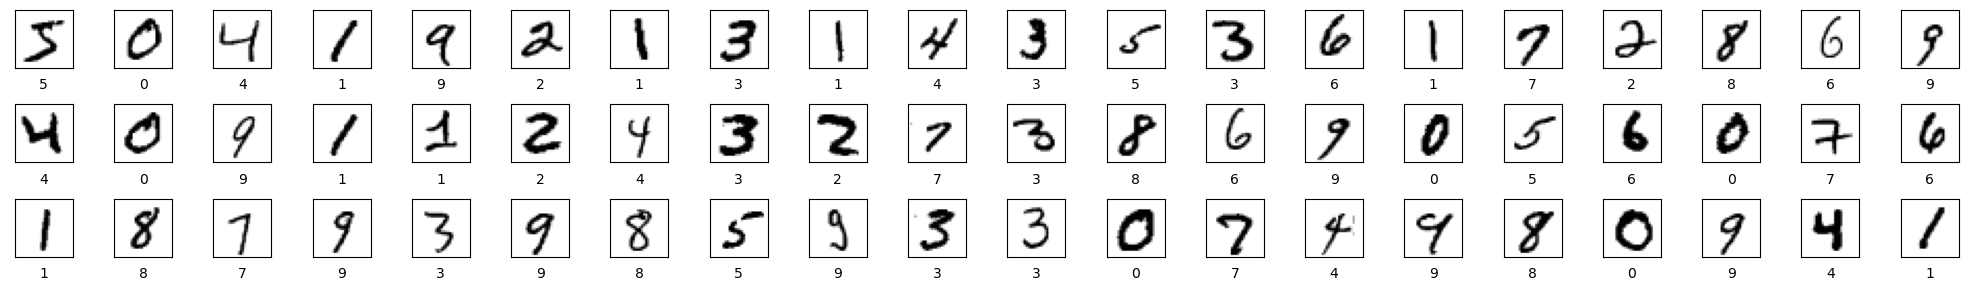

In [ ]:
ROWS = 3
COLS = 20
i = 0

plt.figure(figsize=(20,3))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(x_train[i], cmap=plt.cm.gray_r)
        
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(y_train[i])
        i += 1
plt.tight_layout()
plt.show() 

Image (#9): Which is digit '4'


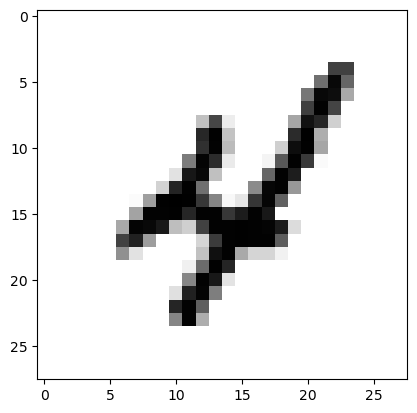

In [ ]:
x_train = x_train.reshape(-1, 28*28).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28*28).astype("float32") / 255.0
digit = 9 # Change to choose new digit
a = x_train[digit].reshape(28,28)
plt.imshow(a, cmap='gray_r')
print(f"Image (#{digit}): Which is digit '{y_train[digit]}'")

In [ ]:
model = keras.Sequential([
    keras.Input(shape=28*28),
    layers.Dense(units=10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)
a = model.fit(x=x_train, y=y_train, epochs=5, batch_size=64, validation_split=0.3)

test_loss, test_acc = model.evaluate(x_test, y_test)
print('\nTest accuracy:', test_acc)

Epoch 1/5
657/657 [==============================] - 6s 7ms/step - loss: 0.6263 - accuracy: 0.8433 - val_loss: 0.3809 - val_accuracy: 0.8962
Epoch 2/5
657/657 [==============================] - 4s 6ms/step - loss: 0.3505 - accuracy: 0.9043 - val_loss: 0.3255 - val_accuracy: 0.9093
Epoch 3/5
657/657 [==============================] - 4s 6ms/step - loss: 0.3125 - accuracy: 0.9133 - val_loss: 0.3060 - val_accuracy: 0.9156
Epoch 4/5
657/657 [==============================] - 4s 6ms/step - loss: 0.2945 - accuracy: 0.9175 - val_loss: 0.2956 - val_accuracy: 0.9177
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.2768 - accuracy: 0.9231

Test accuracy: 0.9230999946594238


In [ ]:
model.compile(
    optimizer='sgd',
    loss='mean_squared_error', 
    metrics=['accuracy']
)
b = model.fit(x=x_train, y=y_train, epochs=5, batch_size=64, validation_split=0.3)

test_loss, test_acc = model.evaluate(x_test, y_test)
print('\nTest accuracy:', test_acc)

Epoch 1/5
657/657 [==============================] - 5s 6ms/step - loss: 27.3419 - accuracy: 0.9243 - val_loss: 27.4633 - val_accuracy: 0.9206
Epoch 2/5
657/657 [==============================] - 4s 7ms/step - loss: 27.3416 - accuracy: 0.9241 - val_loss: 27.4630 - val_accuracy: 0.9211
Epoch 3/5
657/657 [==============================] - 5s 7ms/step - loss: 27.3412 - accuracy: 0.9240 - val_loss: 27.4626 - val_accuracy: 0.9202
Epoch 4/5
657/657 [==============================] - 4s 7ms/step - loss: 27.3407 - accuracy: 0.9233 - val_loss: 27.4620 - val_accuracy: 0.9186
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 27.3225 - accuracy: 0.9171

Test accuracy: 0.9171000123023987


In [ ]:
model.compile(
    optimizer='RMSProp',
    loss='mean_squared_error', 
    metrics=['accuracy']
)
c = model.fit(x=x_train, y=y_train, epochs=5, batch_size=64, validation_split=0.3)

test_loss, test_acc = model.evaluate(x_test, y_test)
print('\nTest accuracy:', test_acc)

Epoch 1/5
657/657 [==============================] - 6s 8ms/step - loss: 27.3015 - accuracy: 0.4316 - val_loss: 27.4067 - val_accuracy: 0.2847
Epoch 2/5
657/657 [==============================] - 4s 6ms/step - loss: 27.2827 - accuracy: 0.2805 - val_loss: 27.4019 - val_accuracy: 0.2991
Epoch 3/5
657/657 [==============================] - 6s 8ms/step - loss: 27.2795 - accuracy: 0.2754 - val_loss: 27.3994 - val_accuracy: 0.2545
Epoch 4/5
657/657 [==============================] - 5s 7ms/step - loss: 27.2773 - accuracy: 0.2612 - val_loss: 27.3975 - val_accuracy: 0.2379
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 27.2552 - accuracy: 0.1971

Test accuracy: 0.19709999859333038


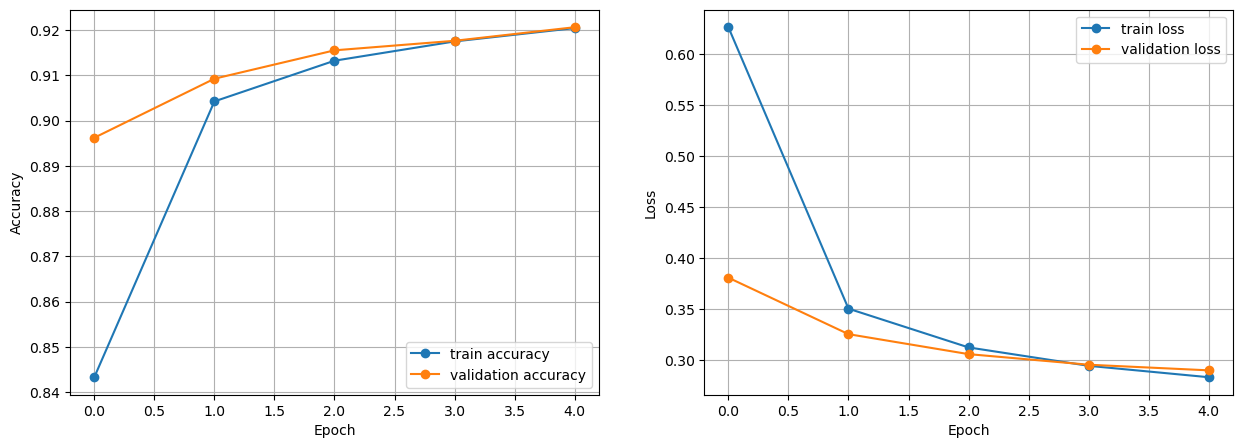

In [ ]:
#ADAM

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(a.history['accuracy'], 'o-', label='train accuracy')
plt.plot(a.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(a.history['loss'], 'o-', label='train loss')
plt.plot(a.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

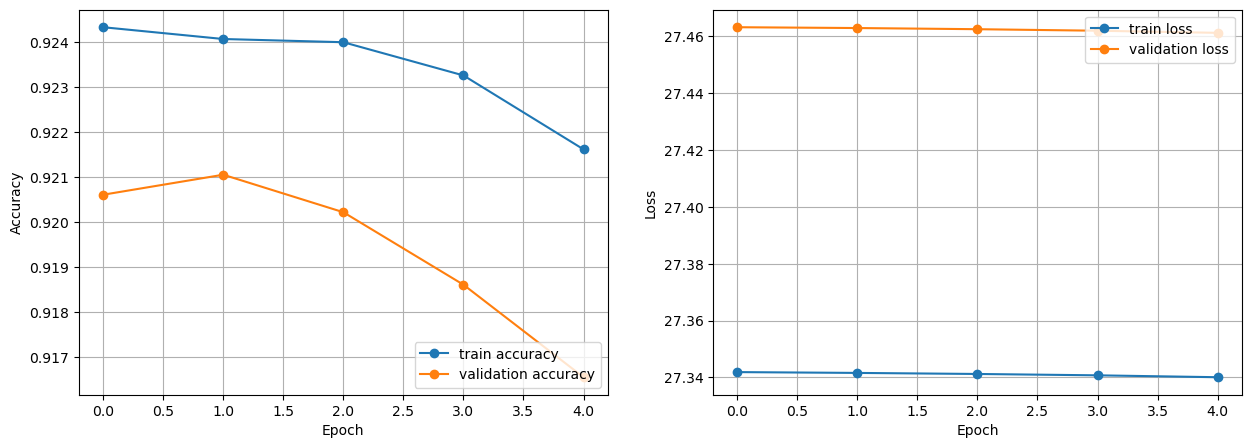

In [ ]:
#SGD

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(b.history['accuracy'], 'o-', label='train accuracy')
plt.plot(b.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(b.history['loss'], 'o-', label='train loss')
plt.plot(b.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

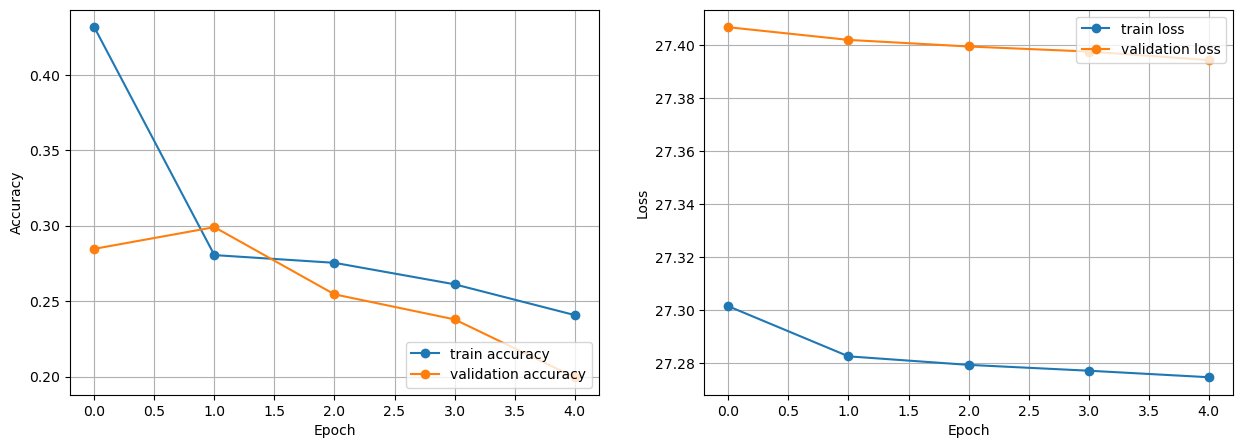

In [ ]:
#RMSprop

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(c.history['accuracy'], 'o-', label='train accuracy')
plt.plot(c.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(c.history['loss'], 'o-', label='train loss')
plt.plot(c.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()